In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


MessageError: Error: credential propagation was unsuccessful

In [11]:
import os
import numpy as np
import pandas as pd
import torch
from multiprocessing import Pool
from sklearn.preprocessing import MinMaxScaler
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import DataLoader, TensorDataset
import joblib
import os
import numpy as np
import pandas as pd
import torch
from multiprocessing import Pool
from sklearn.preprocessing import MinMaxScaler
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import DataLoader, TensorDataset
import joblib

SEQUENCE_LENGTH = 600
BATCH_SIZE = 64
EPOCHS = 250
LEARNING_RATE = 1e-5
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
!unzip -qq '/content/gdrive/MyDrive/data_aug_new.zip'

#Load file

In [ ]:
data = np.load('/content/gdrive/MyDrive/513_600_2slices_shift.npz')


In [ ]:
data = np.load('/content/gdrive/MyDrive/513_600_3slices_shift.npz')


In [ ]:
data = np.load('/content/gdrive/MyDrive/513_600_2slices_shift_rate.npz')


In [ ]:
data = np.load('/content/gdrive/MyDrive/513_600_3slices_shift_rate.npz')


In [ ]:



X_original = data['X_original']
y_original = data['y_original']
X_augmented = data['X_augmented']
y_augmented = data['y_augmented']


# X_original1 = data1['X_original']
# y_original1 = data1['y_original']
# X_augmented1 = data1['X_augmented']
# y_augmented1 = data1['y_augmented']


# Convert data to PyTorch tensors
try:
    X_original = torch.tensor(np.array(X_original), dtype=torch.float32).to(DEVICE)
    y_original = torch.tensor(np.array(y_original), dtype=torch.float32).to(DEVICE)
    X_augmented = torch.tensor(np.array(X_augmented), dtype=torch.float32).to(DEVICE)
    y_augmented = torch.tensor(np.array(y_augmented), dtype=torch.float32).to(DEVICE)
except Exception as e:
    print(f"Error during tensor conversion: {e}")
    print(f"Shapes: X_original - {np.array(X_original).shape}, y_original - {np.array(y_original).shape}")
    print(f"Shapes: X_augmented - {np.array(X_augmented).shape}, y_augmented - {np.array(y_augmented).shape}")
    raise


# # Convert data to PyTorch tensors
# try:
#     X_original1 = torch.tensor(np.array(X_original1), dtype=torch.float32).to(DEVICE)
#     y_original1 = torch.tensor(np.array(y_original1), dtype=torch.float32).to(DEVICE)
#     X_augmented1 = torch.tensor(np.array(X_augmented1), dtype=torch.float32).to(DEVICE)
#     y_augmented1 = torch.tensor(np.array(y_augmented1), dtype=torch.float32).to(DEVICE)
# except Exception as e:
#     print(f"Error during tensor conversion: {e}")
#     print(f"Shapes: X_original1 - {np.array(X_original1).shape}, y_original1 - {np.array(y_original1).shape}")
#     print(f"Shapes: X_augmented1 - {np.array(X_augmented1).shape}, y_augmented1 - {np.array(y_augmented1).shape}")
#     raise


X_train = torch.cat([X_original, X_augmented])
y_train = torch.cat([y_original, y_augmented])


# X_train1 = torch.cat([X_original1, X_augmented1])
# y_train1 = torch.cat([y_original1, y_augmented1])

In [ ]:
selected_columns = X_train[:,:, [0, 1, 5, 7, 9]]
X_train = X_train[:,:, [0, 1, 5, 7, 9]]

print(selected_columns[0])

tensor([[ 0.0000, -1.0000, 37.0000,  2.0000, -1.2100],
        [-1.0000,  0.0000, 36.0000,  2.0000, -1.2100],
        [ 0.0000,  0.0000, 36.0000,  2.0000, -1.2100],
        ...,
        [-1.0000, -1.0000, 27.0000,  2.0000, -0.1749],
        [-1.0000, -2.0000, 26.0000,  2.0000, -0.1749],
        [-2.0000, -1.0000, 24.0000,  2.0000, -0.1749]], device='cuda:0')


# **without two acc**

In [ ]:
selected_columns = X_train[:,:, [0, 1, 5, 7, 9]]
X_train = X_train[:,:, [0, 5, 7, 9]]

print(selected_columns[0])

tensor([[ 0.0000, -1.0000, 37.0000,  2.0000, -1.2100],
        [-1.0000,  0.0000, 36.0000,  2.0000, -1.2100],
        [ 0.0000,  0.0000, 36.0000,  2.0000, -1.2100],
        ...,
        [-1.0000, -1.0000, 27.0000,  2.0000, -0.1749],
        [-1.0000, -2.0000, 26.0000,  2.0000, -0.1749],
        [-2.0000, -1.0000, 24.0000,  2.0000, -0.1749]], device='cuda:0')


# **a**

In [ ]:
# Compute the minimum and maximum across dimensions (0, 1)
min_x = torch.min(X_train, dim=0)[0]  # Min across the first dimension
min_x = torch.min(min_x, dim=0)[0].to(DEVICE)  # Min across the second dimension

max_x = torch.max(X_train, dim=0)[0]  # Max across the first dimension
max_x = torch.max(max_x, dim=0)[0].to(DEVICE)  # Max across the second dimension

print("Min values:", min_x)
print("Max values:", max_x)


Min values: tensor([-119.0000,    0.0000,    0.0000, -224.3478], device='cuda:0')
Max values: tensor([119., 184.,   5., 240.], device='cuda:0')


In [ ]:
# Compute the minimum and maximum across dimensions (0, 1)
min_x = torch.min(y_train, dim=0)[0]  # Min across the first dimension
min_x = torch.min(min_x, dim=0)[0].to(DEVICE)  # Min across the second dimension

max_x = torch.max(y_train, dim=0)[0]  # Max across the first dimension
max_x = torch.max(max_x, dim=0)[0].to(DEVICE)  # Max across the second dimension

print("Min values:", min_x)
print("Max values:", max_x)


Min values: tensor([0.], device='cuda:0')
Max values: tensor([20.7850], device='cuda:0')


In [ ]:
print("Original shape:", X_train.shape)


Original shape: torch.Size([23274, 600, 4])


In [ ]:
# Create a mask for rows in y where all values are >= 0
mask = (y_train >= 0).all(dim=(1, 2))  # True for sequences with no negative values in y

# Apply the mask to x
X_train = X_train[mask]
y_train = y_train[mask]  # Optionally filter y as well for consistency

print("Original x shape:", X_train.shape)
# print("Filtered x shape:", x_train_filtered.shape)
print("Original y shape:", y_train.shape)
# print("Filtered y shape:", y_train_filtered.shape)


Original x shape: torch.Size([8270, 600, 4])
Original y shape: torch.Size([8270, 600, 1])


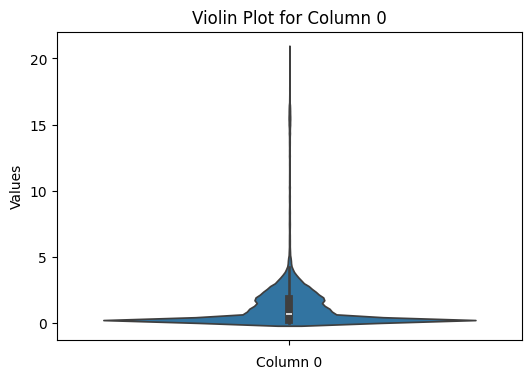

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Save processed data for later use
for i in range(y_train.shape[2]):  # Iterate over columns (third dimension)
    col_data = y_train[:, :, i].flatten().cpu().numpy()  # Flatten, move to CPU, convert to numpy
    np.save(f"column_{i}.npy", col_data)  # Save each column to a .npy file

# Create separate plots for each column
for i in range(y_train.shape[2]):
    # Load column data
    col_data = np.load(f"column_{i}.npy")

    # Plot violin plot for the column
    plt.figure(figsize=(6, 4))  # Create a new figure for each plot
    sns.violinplot(data=col_data)
    plt.title(f"Violin Plot for Column {i}")
    plt.xlabel(f"Column {i}")
    plt.ylabel("Values")

    # Save or show the plot
    plt.savefig(f"violin_plot_column_{i}.png")  # Save plot to file
    plt.show()  # Show the plot


In [ ]:
mean_x = torch.mean(y_train, dim=(0, 1)).to(DEVICE)
std_x = torch.std(y_train, dim=(0, 1)).to(DEVICE)
mean_x , std_x

(tensor([1.3182], device='cuda:0'), tensor([1.9448], device='cuda:0'))

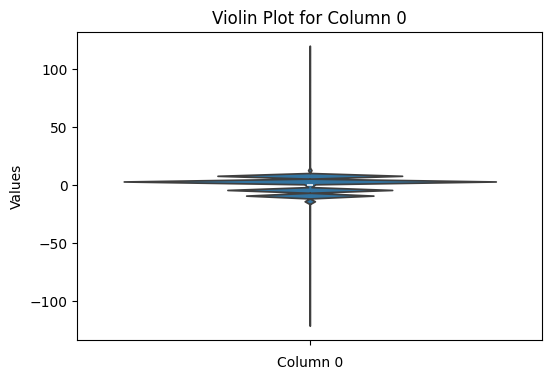

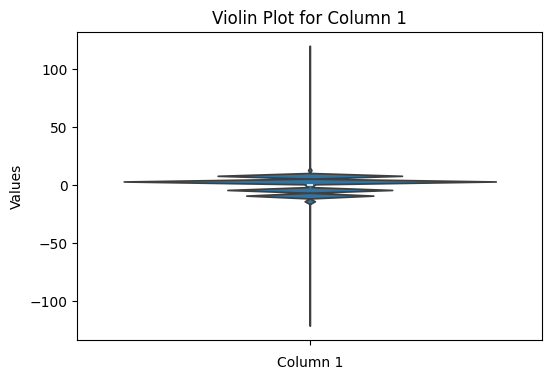

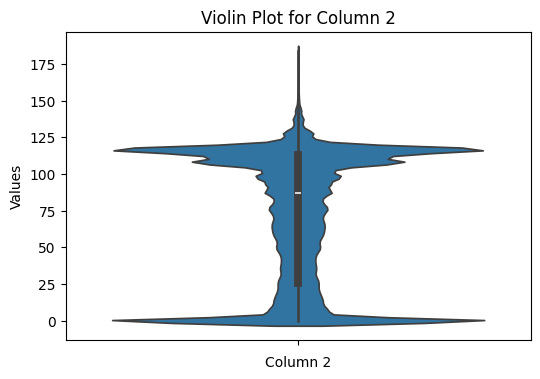

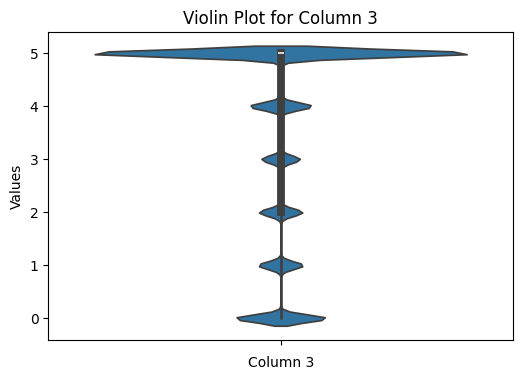

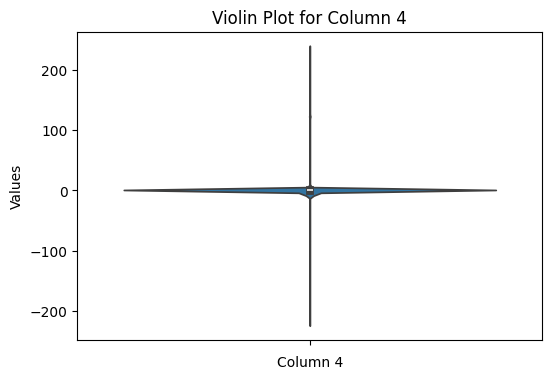

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Save processed data for later use
for i in range(selected_columns.shape[2]):  # Iterate over columns (third dimension)
    col_data = selected_columns[:, :, i].flatten().cpu().numpy()  # Flatten, move to CPU, convert to numpy
    np.save(f"column_{i}.npy", col_data)  # Save each column to a .npy file

# Create separate plots for each column
for i in range(selected_columns.shape[2]):
    # Load column data
    col_data = np.load(f"column_{i}.npy")

    # Plot violin plot for the column
    plt.figure(figsize=(6, 4))  # Create a new figure for each plot
    sns.violinplot(data=col_data)
    plt.title(f"Violin Plot for Column {i}")
    plt.xlabel(f"Column {i}")
    plt.ylabel("Values")

    # Save or show the plot
    plt.savefig(f"violin_plot_column_{i}.png")  # Save plot to file
    plt.show()  # Show the plot


In [ ]:
# # this cell for delete coolant temp from data
# X_train = X_train[:, :, :-1]  # Slicing to exclude the last column
# X_train1 = X_train1[:, :, :-1]  # Slicing to exclude the last column


In [ ]:
X_train.shape()

TypeError: 'torch.Size' object is not callable

In [ ]:
X_train.shape[0]

23254

In [ ]:
X_train[55000]

tensor([[5.2632e-01, 5.2632e-01, 3.5313e-10, 1.2800e-03, 5.2632e-01],
        [5.2632e-01, 5.2632e-01, 3.4688e-10, 1.2800e-03, 5.2632e-01],
        [5.2632e-01, 5.2632e-01, 3.4062e-10, 1.2800e-03, 5.2632e-01],
        ...,
        [5.2632e-01, 5.2632e-01, 3.5000e-10, 1.6000e-03, 5.2631e-01],
        [5.2632e-01, 5.2632e-01, 3.5313e-10, 1.6000e-03, 5.2631e-01],
        [5.2632e-01, 5.2632e-01, 3.5313e-10, 1.6000e-03, 5.2631e-01]],
       device='cuda:0')

# **Normalize**

In [ ]:

# Convert the min and max values to tensors
min_val_x = torch.tensor([-10,-10, 0,0, -10], dtype=torch.float32).to(DEVICE)
max_val_x = torch.tensor([10,10,200, 5, 10], dtype=torch.float32).to(DEVICE)

#for without two acc
min_val_x = torch.tensor([-10, 0,0, -10], dtype=torch.float32).to(DEVICE)
max_val_x = torch.tensor([10, 200, 5, 10], dtype=torch.float32).to(DEVICE)


min_val_y = torch.tensor([0], dtype=torch.float32).to(DEVICE)
max_val_y = torch.tensor([30000], dtype=torch.float32).to(DEVICE)

# Custom normalization function for X
def custom_normalize_X(data, min_vals, max_vals):
    feature_count = 4
    for i in range(feature_count):
        data[:, :, i] = (data[:, :, i] - min_vals[i]) / (max_vals[i] - min_vals[i])
    return data

# Custom normalization function for y
def custom_normalize_y(data, min_val, max_val):
    return (data - min_val) / (max_val - min_val)

# Normalize X_train and X_test
X_train_normalized = custom_normalize_X(X_train, min_val_x, max_val_x)
# X_test_normalized = custom_normalize_X(X_test, min_val_x, max_val_x)

# Normalize y_train and y_test
y_train_normalized = custom_normalize_y(y_train, min_val_y, max_val_y)
# y_test_normalized = custom_normalize_y(y_test, min_val_y, max_val_y)


# # Normalize X_train and X_test
# X_train_normalized1 = custom_normalize_X(X_train1, min_val_x, max_val_x)
# # X_test_normalized = custom_normalize_X(X_test, min_val_x, max_val_x)

# # Normalize y_train and y_test
# y_train_normalized1 = custom_normalize_y(y_train1, min_val_y, max_val_y)
# y_test_normalized = custom_normalize_y(y_test, min_val_y, max_val_y)


# **Normla for rate**

In [ ]:
min_val_x = torch.tensor([-10,-10, 0,0, -10], dtype=torch.float32).to(DEVICE)
max_val_x = torch.tensor([10,10,200, 5, 10], dtype=torch.float32).to(DEVICE)

#for without two acc
min_val_x = torch.tensor([-10, 0,0, -10], dtype=torch.float32).to(DEVICE)
max_val_x = torch.tensor([10, 200, 5, 10], dtype=torch.float32).to(DEVICE)
# Custom normalization function for X
def custom_normalize_X(data, min_vals, max_vals):
    feature_count = 4
    for i in range(feature_count):
        data[:, :, i] = (data[:, :, i] - min_vals[i]) / (max_vals[i] - min_vals[i])
    return data

X_train_normalized = custom_normalize_X(X_train, min_val_x, max_val_x)

y_train_normalized = y_train

In [ ]:
X_train_normalized

tensor([[[0.5000, 0.4500, 0.1850, 0.4000, 0.4395],
         [0.4500, 0.5000, 0.1800, 0.4000, 0.4395],
         [0.5000, 0.5000, 0.1800, 0.4000, 0.4395],
         ...,
         [0.4500, 0.4500, 0.1350, 0.4000, 0.4913],
         [0.4500, 0.4000, 0.1300, 0.4000, 0.4913],
         [0.4000, 0.4500, 0.1200, 0.4000, 0.4913]],

        [[0.5000, 0.5000, 0.0000, 0.2000, 0.5000],
         [0.5000, 0.5500, 0.0000, 0.2000, 0.5000],
         [0.5500, 0.5000, 0.0050, 0.2000, 0.5000],
         ...,
         [0.5000, 0.4500, 0.1650, 0.4000, 0.5471],
         [0.4500, 0.5000, 0.1600, 0.4000, 0.5471],
         [0.5000, 0.4000, 0.1600, 0.4000, 0.5000]],

        [[0.5000, 0.5000, 0.0000, 0.0000, 0.6015],
         [0.5000, 0.5000, 0.0000, 0.0000, 0.6015],
         [0.5000, 0.5000, 0.0000, 0.0000, 0.6015],
         ...,
         [0.5500, 0.5000, 0.3400, 0.8000, 0.4181],
         [0.5000, 0.5500, 0.3400, 0.8000, 0.5000],
         [0.5500, 0.6000, 0.3450, 0.8000, 0.4550]],

        ...,

        [[0.8500, 0.

In [ ]:
X_train_normalized.shape

torch.Size([8270, 600, 4])

In [ ]:
y_train_normalized1.shape

torch.Size([55850, 600, 1])

# **Standard**

In [ ]:
# Compute the mean and standard deviation for X and y from the training set
mean_x = torch.mean(X_train, dim=(0, 1)).to(DEVICE)
std_x = torch.std(X_train, dim=(0, 1)).to(DEVICE)

mean_y = torch.mean(y_train).to(DEVICE)
std_y = torch.std(y_train).to(DEVICE)

# Custom standardization function for X
def custom_standardize_X(data, mean_vals, std_vals):
    for i in range(data.shape[-1]):
        data[:, :, i] = (data[:, :, i] - mean_vals[i]) / std_vals[i]
    return data

# Custom standardization function for y
def custom_standardize_y(data, mean_val, std_val):
    return (data - mean_val) / std_val

# Standardize X_train and y_train
X_train_normalized = custom_standardize_X(X_train, mean_x, std_x)
y_train_normalized = custom_standardize_y(y_train, mean_y, std_y)

# # Standardize X_test and y_test using the same mean and std as training data
# X_test_standardized = custom_standardize_X(X_test, mean_x, std_x)
# y_test_standardized = custom_standardize_y(y_test, mean_y, std_y)


X_train_normalized1 = custom_standardize_X(X_train1, mean_x, std_x)
y_train_normalized1 = custom_standardize_y(y_train1, mean_y, std_y)


import json

# Convert tensors to lists to make them serializable
mean_x_list = mean_x.cpu().tolist()
std_x_list = std_x.cpu().tolist()
mean_y_list = mean_y.cpu().tolist()
std_y_list = std_y.cpu().tolist()

# Save the mean and std values in a JSON file
normalization_params = {
    'mean_x': mean_x_list,
    'std_x': std_x_list,
    'mean_y': mean_y_list,
    'std_y': std_y_list
}

# Write the normalization parameters to a JSON file
with open('normalization_params.json', 'w') as f:
    json.dump(normalization_params, f)


# **model**

In [12]:
import torch.nn as nn
import torch

class FuelConsumptionModel(nn.Module):
    def __init__(self, input_size):
        super(FuelConsumptionModel, self).__init__()
        # LSTM layers
        self.lstm1 = nn.LSTM(input_size, 32, batch_first=True, bidirectional=True)
        self.lstm2 = nn.LSTM(64, 32, batch_first=True, bidirectional=True)

        # Layer Normalization after each LSTM
        self.layer_norm1 = nn.LayerNorm(64)
        self.layer_norm2 = nn.LayerNorm(64)

        # Dropout layers
        self.dropout1 = nn.Dropout(0.2)
        self.dropout2 = nn.Dropout(0.2)

        # Dense output layer
        self.dense = nn.Linear(64, 1)

    def forward(self, x):
        # LSTM 1 + Layer Normalization + Dropout
        x, _ = self.lstm1(x)
        x = self.layer_norm1(x)  # Apply layer normalization after LSTM1
        x = self.dropout1(x)

        # LSTM 2 + Layer Normalization + Dropout
        x, _ = self.lstm2(x)
        x = self.layer_norm2(x)  # Apply layer normalization after LSTM2
        x = self.dropout2(x)

        # Dense layer for final output
        x = self.dense(x)

        return x


In [ ]:
# Check if X_train_normalized and y_train_normalized have the same number of samples
print(f"X_train_normalized shape: {X_train_normalized.shape}")
print(f"y_train_normalized shape: {y_train_normalized.shape}")

# Ensure they have the same length in the first dimension
if len(X_train_normalized) != len(y_train_normalized):
    raise ValueError(f"Mismatch in number of samples: {len(X_train_normalized)} in X vs {len(y_train_normalized)} in y")

# Calculate train size
train_size = int(0.8 * len(X_train_normalized))

# Split the data while preserving the order
X_train_split = X_train_normalized[:train_size]
y_train_split = y_train_normalized[:train_size]

X_val_split = X_train_normalized[train_size:]
y_val_split = y_train_normalized[train_size:]


# X_train_split = X_train_normalized
# y_train_split = y_train_normalized

# X_val_split = X_train_normalized1
# y_val_split = y_train_normalized1

print(f"Train size: {train_size}, Validation size: {len(X_val_split)}")


X_train_normalized shape: torch.Size([8270, 600, 4])
y_train_normalized shape: torch.Size([8270, 600, 1])
Train size: 6616, Validation size: 1654


In [ ]:
X_train_split.shape

torch.Size([18603, 600, 4])

In [ ]:
y_train_split.shape

torch.Size([44616, 600, 1])

# **train with coolant**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR  # Importing StepLR for learning rate decay
from torch.optim.lr_scheduler import ReduceLROnPlateau
# Assuming `FuelConsumptionModel`, `X_train_normalized`, `train_loader`, `val_loader`, `DEVICE`, and `EPOCHS` are defined

# Choose a single loss function to use for all experiments
criterion = nn.L1Loss()  # You can change this to your preferred loss function

EPOCHS = 250
# Define weight decay values and initial learning rates for decay schedules
weight_decay_values = 1e-5
initial_learning_rates = [1e-4]  # Two starting learning rates

# Initialize variables to track the best parameters
best_weight_decay = None
best_initial_lr = None
best_model_weights = None
best_val_loss = float('inf')

ini_batches = [64]
# Loop over all combinations of initial learning rates and weight decay values

BATCH_SIZE = 64
# Create DataLoader for training and validation sets
train_loader = DataLoader(TensorDataset(X_train_split, y_train_split), batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val_split, y_val_split), batch_size=BATCH_SIZE, shuffle=False)

for init_lr in initial_learning_rates:
    # Initialize model, criterion, and optimizer for each combination
    model = FuelConsumptionModel(input_size=X_train_split.shape[-1]).to(DEVICE)
    optimizer = optim.Adam(model.parameters(), lr=init_lr, weight_decay=weight_decay_values)
    # scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=True)
    scheduler = StepLR(optimizer, step_size=50, gamma=0.5)  # Decay LR by 0.5 every 50 epochs

    # Early stopping parameters
    patience = 12  # Number of epochs to wait before stopping if no improvement
    best_loss = float('inf')  # Initialize best loss to infinity
    epochs_without_improvement = 0  # Counter for epochs without improvement

    # Training loop with early stopping
    model.train()
    for epoch in range(EPOCHS):
        running_loss = 0.0
        model.train()  # Ensure model is in training mode

        # Training phase
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(DEVICE), targets.to(DEVICE)  # Ensure data is on the correct device
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # Calculate average loss for the epoch
        avg_training_loss = running_loss / len(train_loader)

        # Validation phase
        model.eval()  # Switch to evaluation mode
        val_running_loss = 0.0
        with torch.no_grad():
            for inputs, targets in val_loader:  # Assume you have a validation DataLoader `val_loader`
                inputs, targets = inputs.to(DEVICE), targets.to(DEVICE)  # Ensure data is on the correct device
                # print(inputs.shape)
                # print(targets.shape)
                outputs = model(inputs)
                # print(outputs.shape)
                val_loss = criterion(outputs, targets)
                val_running_loss += val_loss.item()

        avg_val_loss = val_running_loss / len(val_loader)

        current_lr = optimizer.param_groups[0]['lr']
        print(f"Epoch [{epoch+1}/{EPOCHS}] ---- Training Loss: {avg_training_loss:.4f} ---- Validation Loss: {avg_val_loss:.6f} ------{current_lr}")

        # print(f"Epoch [{epoch+1}/{EPOCHS}] ---- Training Loss: {avg_training_loss:.4f} ---- Validation Loss: {avg_val_loss:.4f}    Init LR: {init_lr:.0e}  WD: {wd:.0e}")

        # Adjust the learning rate
        # scheduler.step(avg_val_loss)
        scheduler.step()

        # Early stopping check
        if avg_val_loss < best_loss:
            best_loss = avg_val_loss
            epochs_without_improvement = 0
        else:
            epochs_without_improvement += 1
            if epochs_without_improvement >= patience:
                print(f"Early stopping at epoch {epoch+1}")
                break

        # Save the model for the current combination
        model_filename = f'best_fuel_consumption_model.pth'
        torch.save(model.state_dict(), model_filename)


print(f"Saved model: {model_filename}")

Epoch [1/250] ---- Training Loss: 1.0496 ---- Validation Loss: 0.865203 ------0.0001
Epoch [2/250] ---- Training Loss: 0.8928 ---- Validation Loss: 0.785880 ------0.0001
Epoch [3/250] ---- Training Loss: 0.8437 ---- Validation Loss: 0.759425 ------0.0001
Epoch [4/250] ---- Training Loss: 0.8242 ---- Validation Loss: 0.766929 ------0.0001
Epoch [5/250] ---- Training Loss: 0.8163 ---- Validation Loss: 0.757819 ------0.0001
Epoch [6/250] ---- Training Loss: 0.8071 ---- Validation Loss: 0.753859 ------0.0001
Epoch [7/250] ---- Training Loss: 0.8024 ---- Validation Loss: 0.754150 ------0.0001
Epoch [8/250] ---- Training Loss: 0.8079 ---- Validation Loss: 0.761154 ------0.0001
Epoch [9/250] ---- Training Loss: 0.7969 ---- Validation Loss: 0.754891 ------0.0001
Epoch [10/250] ---- Training Loss: 0.7926 ---- Validation Loss: 0.754432 ------0.0001
Epoch [11/250] ---- Training Loss: 0.7864 ---- Validation Loss: 0.751678 ------0.0001
Epoch [12/250] ---- Training Loss: 0.7820 ---- Validation Loss:

# **train without coolant**

# **fine tuning model**

In [ ]:
data = np.load('/content/gdrive/MyDrive/fine_tune600.npz')
data1 = np.load('/content/gdrive/MyDrive/fine_tune600.npz')

In [ ]:



X_original = data['X_original']
y_original = data['y_original']
X_augmented = data['X_augmented']
y_augmented = data['y_augmented']


X_original1 = data1['X_original']
y_original1 = data1['y_original']
X_augmented1 = data1['X_augmented']
y_augmented1 = data1['y_augmented']


# Convert data to PyTorch tensors
try:
    X_original = torch.tensor(np.array(X_original), dtype=torch.float32).to(DEVICE)
    y_original = torch.tensor(np.array(y_original), dtype=torch.float32).to(DEVICE)
    X_augmented = torch.tensor(np.array(X_augmented), dtype=torch.float32).to(DEVICE)
    y_augmented = torch.tensor(np.array(y_augmented), dtype=torch.float32).to(DEVICE)
except Exception as e:
    print(f"Error during tensor conversion: {e}")
    print(f"Shapes: X_original - {np.array(X_original).shape}, y_original - {np.array(y_original).shape}")
    print(f"Shapes: X_augmented - {np.array(X_augmented).shape}, y_augmented - {np.array(y_augmented).shape}")
    raise


# Convert data to PyTorch tensors
try:
    X_original1 = torch.tensor(np.array(X_original1), dtype=torch.float32).to(DEVICE)
    y_original1 = torch.tensor(np.array(y_original1), dtype=torch.float32).to(DEVICE)
    X_augmented1 = torch.tensor(np.array(X_augmented1), dtype=torch.float32).to(DEVICE)
    y_augmented1 = torch.tensor(np.array(y_augmented1), dtype=torch.float32).to(DEVICE)
except Exception as e:
    print(f"Error during tensor conversion: {e}")
    print(f"Shapes: X_original1 - {np.array(X_original1).shape}, y_original1 - {np.array(y_original1).shape}")
    print(f"Shapes: X_augmented1 - {np.array(X_augmented1).shape}, y_augmented1 - {np.array(y_augmented1).shape}")
    raise


X_train = torch.cat([X_original, X_augmented])
y_train = torch.cat([y_original, y_augmented])

X_train1 = torch.cat([X_original1, X_augmented1])
y_train1 = torch.cat([y_original1, y_augmented1])

In [ ]:
# this cell for delete coolant temp from data
X_train = X_train[:, :, :-1]  # Slicing to exclude the last column
X_train1 = X_train1[:, :, :-1]  # Slicing to exclude the last column


In [ ]:
X_train = torch.nan_to_num(X_train, nan=0.0)

In [ ]:

# Convert the min and max values to tensors
min_val_x = torch.tensor([0, 0, -10, -10,0], dtype=torch.float32).to(DEVICE)
max_val_x = torch.tensor([6, 150, 10, 10,130], dtype=torch.float32).to(DEVICE)

#for without coolant
min_val_x = torch.tensor([0, 0, -10, -10], dtype=torch.float32).to(DEVICE)
max_val_x = torch.tensor([6, 150, 10, 10], dtype=torch.float32).to(DEVICE)


min_val_y = torch.tensor([0], dtype=torch.float32).to(DEVICE)
max_val_y = torch.tensor([10000], dtype=torch.float32).to(DEVICE)

# Custom normalization function for X
def custom_normalize_X(data, min_vals, max_vals):
    for i in range(data.shape[-1]):
        data[:, :, i] = (data[:, :, i] - min_vals[i]) / (max_vals[i] - min_vals[i])
    return data

# Custom normalization function for y
def custom_normalize_y(data, min_val, max_val):
    return (data - min_val) / (max_val - min_val)

# Normalize X_train and X_test
X_train_normalized = custom_normalize_X(X_train, min_val_x, max_val_x)
# X_test_normalized = custom_normalize_X(X_test, min_val_x, max_val_x)

# Normalize y_train and y_test
y_train_normalized = custom_normalize_y(y_train, min_val_y, max_val_y)
# y_test_normalized = custom_normalize_y(y_test, min_val_y, max_val_y)


# Normalize X_train and X_test
X_train_normalized1 = custom_normalize_X(X_train1, min_val_x, max_val_x)
# X_test_normalized = custom_normalize_X(X_test, min_val_x, max_val_x)

# Normalize y_train and y_test
y_train_normalized1 = custom_normalize_y(y_train1, min_val_y, max_val_y)
# y_test_normalized = custom_normalize_y(y_test, min_val_y, max_val_y)


In [ ]:
X_train_normalized

tensor([[[0.8333, 0.6067, 0.5355, 0.5000],
         [0.8333, 0.6133, 0.5355, 0.5500],
         [0.8333, 0.6200, 0.5355, 0.5500],
         ...,
         [0.8333, 0.7200, 0.5846, 0.3000],
         [0.8333, 0.7000, 0.5846, 0.3500],
         [0.8333, 0.6733, 0.5846, 0.3000]],

        [[0.8333, 0.8733, 0.5363, 0.5000],
         [0.8333, 0.8800, 0.5363, 0.5500],
         [0.8333, 0.8867, 0.5363, 0.5500],
         ...,
         [0.1667, 0.0533, 0.5648, 0.5500],
         [0.1667, 0.0533, 0.5648, 0.5000],
         [0.1667, 0.0533, 0.5000, 0.5000]],

        [[0.8333, 0.7800, 0.4805, 0.5000],
         [0.8333, 0.7867, 0.4805, 0.5500],
         [0.8333, 0.7933, 0.4805, 0.5500],
         ...,
         [0.8333, 0.7200, 0.5904, 0.5000],
         [0.8333, 0.7133, 0.5904, 0.4500],
         [0.8333, 0.7133, 0.5904, 0.5000]],

        ...,

        [[0.8333, 0.6733, 0.5455, 0.4500],
         [0.8333, 0.6733, 0.5455, 0.5000],
         [0.8333, 0.6733, 0.5455, 0.5000],
         ...,
         [0.6667, 0.4

In [ ]:
has_nan = torch.isnan(X_train).any()

if has_nan:
    print("The tensor contains NaN values.")
else:
    print("The tensor does not contain any NaN values.")

The tensor does not contain any NaN values.


In [ ]:
import torch
import torch.nn as nn

class FuelConsumptionModel(nn.Module):
    def __init__(self, input_size):
        super(FuelConsumptionModel, self).__init__()
        # LSTM layers
        self.lstm1 = nn.LSTM(input_size, 32, batch_first=True, bidirectional=True)
        self.lstm2 = nn.LSTM(64, 32, batch_first=True, bidirectional=True)

        # Layer Normalization after each LSTM
        self.layer_norm1 = nn.LayerNorm(64)
        self.layer_norm2 = nn.LayerNorm(64)

        # Dropout layers
        self.dropout1 = nn.Dropout(0.2)
        self.dropout2 = nn.Dropout(0.2)

        # Dense output layer
        self.dense = nn.Linear(64, 1)

    def forward(self, x):
        # LSTM 1 + Layer Normalization + Dropout
        x, _ = self.lstm1(x)
        x = self.layer_norm1(x)
        x = self.dropout1(x)

        # LSTM 2 + Layer Normalization + Dropout
        x, _ = self.lstm2(x)
        x = self.layer_norm2(x)
        x = self.dropout2(x)

        # Dense layer for final output
        x = self.dense(x)
        return x

# Function to load the pre-trained model and freeze the first layer
def load_and_freeze_model(model_path, input_size):
    model = FuelConsumptionModel(input_size=input_size)
    model.load_state_dict(torch.load(model_path, map_location=DEVICE))
    model.to(DEVICE)

    # Freeze the first LSTM layer
    for param in model.lstm1.parameters():
        param.requires_grad = False


    model.eval()
    return model

# Example usage
model_path = '/content/sample_data/normal_old_without.pth'  # Replace with the actual path
input_size = 4  # Update this according to your input size

# Load the model with the first layer frozen
model = load_and_freeze_model(model_path, input_size)

# Now, the model is ready for fine-tuning on new data.
# Only the parameters of the layers after lstm1 will be updated during training.


<ipython-input-114-d35190ccdb36>:40: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=DEVICE))


In [ ]:
import torch
import torch.nn as nn

class FuelConsumptionModel(nn.Module):
    def __init__(self, input_size):
        super(FuelConsumptionModel, self).__init__()
        # LSTM layers
        self.lstm1 = nn.LSTM(input_size, 32, batch_first=True, bidirectional=True)
        self.lstm2 = nn.LSTM(64, 32, batch_first=True, bidirectional=True)

        # Layer Normalization after each LSTM
        self.layer_norm1 = nn.LayerNorm(64)
        self.layer_norm2 = nn.LayerNorm(64)

        # Dropout layers
        self.dropout1 = nn.Dropout(0.2)
        self.dropout2 = nn.Dropout(0.2)

        # Dense output layer
        self.dense = nn.Linear(64, 1)

    def forward(self, x):
        # LSTM 1 + Layer Normalization + Dropout
        x, _ = self.lstm1(x)
        x = self.layer_norm1(x)
        x = self.dropout1(x)

        # LSTM 2 + Layer Normalization + Dropout
        x, _ = self.lstm2(x)
        x = self.layer_norm2(x)
        x = self.dropout2(x)

        # Dense layer for final output
        x = self.dense(x)
        return x

# Function to load the pre-trained model and freeze all except the dense layer
def load_and_freeze_model(model_path, input_size):
    model = FuelConsumptionModel(input_size=input_size)
    model.load_state_dict(torch.load(model_path, map_location=DEVICE))
    model.to(DEVICE)

    # Freeze all parameters except the dense (linear) layer
    # for name, param in model.named_parameters():
    #     if 'dense' not in name:
    #         param.requires_grad = False

    model.eval()
    return model

# Example usage
model_path = '/content/sample_data/normal_old_without.pth'  # Replace with the actual path
input_size = 4  # Update this according to your input size

# Load the model with only the dense layer unfrozen
model = load_and_freeze_model(model_path, input_size)

# Now, only the dense layer parameters will be updated during fine-tuning.


<ipython-input-105-397ac4701523>:40: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=DEVICE))


In [ ]:
# Check if X_train_normalized and y_train_normalized have the same number of samples
print(f"X_train_normalized shape: {X_train_normalized.shape}")
print(f"y_train_normalized shape: {y_train_normalized.shape}")

# Ensure they have the same length in the first dimension
if len(X_train_normalized) != len(y_train_normalized):
    raise ValueError(f"Mismatch in number of samples: {len(X_train_normalized)} in X vs {len(y_train_normalized)} in y")

# Calculate train size
train_size = int(0.8 * len(X_train_normalized))

# Split the data while preserving the order
X_train_split = X_train_normalized[:train_size]
y_train_split = y_train_normalized[:train_size]

X_val_split = X_train_normalized[train_size:]
y_val_split = y_train_normalized[train_size:]


# X_train_split = X_train_normalized
# y_train_split = y_train_normalized

# X_val_split = X_train_normalized1
# y_val_split = y_train_normalized1

print(f"Train size: {train_size}, Validation size: {len(X_val_split)}")


X_train_normalized shape: torch.Size([20718, 600, 4])
y_train_normalized shape: torch.Size([20718, 600, 1])
Train size: 16574, Validation size: 4144


In [ ]:
model

FuelConsumptionModel(
  (lstm1): LSTM(4, 32, batch_first=True, bidirectional=True)
  (lstm2): LSTM(64, 32, batch_first=True, bidirectional=True)
  (layer_norm1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
  (layer_norm2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (dropout2): Dropout(p=0.2, inplace=False)
  (dense): Linear(in_features=64, out_features=1, bias=True)
)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR  # Importing StepLR for learning rate decay
from torch.optim.lr_scheduler import ReduceLROnPlateau
# Assuming `FuelConsumptionModel`, `X_train_normalized`, `train_loader`, `val_loader`, `DEVICE`, and `EPOCHS` are defined

# Choose a single loss function to use for all experiments
criterion = nn.L1Loss()  # You can change this to your preferred loss function

EPOCHS = 250
# Define weight decay values and initial learning rates for decay schedules
weight_decay_values = 1e-5
initial_learning_rates = [1e-4]  # Two starting learning rates

# Initialize variables to track the best parameters
best_weight_decay = None
best_initial_lr = None
best_model_weights = None
best_val_loss = float('inf')

ini_batches = [64]
# Loop over all combinations of initial learning rates and weight decay values

BATCH_SIZE = 64
# Create DataLoader for training and validation sets
train_loader = DataLoader(TensorDataset(X_train_split, y_train_split), batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val_split, y_val_split), batch_size=BATCH_SIZE, shuffle=False)

for init_lr in initial_learning_rates:
    # Initialize model, criterion, and optimizer for each combination
    model = load_and_freeze_model(model_path, input_size)

    optimizer = optim.Adam(model.parameters(), lr=init_lr, weight_decay=weight_decay_values)
    scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, verbose=True)
    # scheduler = StepLR(optimizer, step_size=50, gamma=0.5)  # Decay LR by 0.5 every 50 epochs

    # Early stopping parameters
    patience = 10  # Number of epochs to wait before stopping if no improvement
    best_loss = float('inf')  # Initialize best loss to infinity
    epochs_without_improvement = 0  # Counter for epochs without improvement

    # Training loop with early stopping
    model.train()
    for epoch in range(EPOCHS):
        running_loss = 0.0
        model.train()  # Ensure model is in training mode

        # Training phase
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(DEVICE), targets.to(DEVICE)  # Ensure data is on the correct device
            optimizer.zero_grad()
            outputs = model(inputs)

            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # Calculate average loss for the epoch
        avg_training_loss = running_loss / len(train_loader)

        # Validation phase
        model.eval()  # Switch to evaluation mode
        val_running_loss = 0.0
        with torch.no_grad():
            for inputs, targets in val_loader:  # Assume you have a validation DataLoader `val_loader`
                inputs, targets = inputs.to(DEVICE), targets.to(DEVICE)  # Ensure data is on the correct device
                outputs = model(inputs)
                val_loss = criterion(outputs, targets)
                val_running_loss += val_loss.item()

        avg_val_loss = val_running_loss / len(val_loader)

        current_lr = optimizer.param_groups[0]['lr']
        print(f"Epoch [{epoch+1}/{EPOCHS}] ---- Training Loss: {avg_training_loss:.4f} ---- Validation Loss: {avg_val_loss:.6f} ------{current_lr}")

        # print(f"Epoch [{epoch+1}/{EPOCHS}] ---- Training Loss: {avg_training_loss:.4f} ---- Validation Loss: {avg_val_loss:.4f}    Init LR: {init_lr:.0e}  WD: {wd:.0e}")

        # Adjust the learning rate
        scheduler.step(avg_val_loss)
        # scheduler.step()

        # Early stopping check
        if avg_val_loss < best_loss:
            best_loss = avg_val_loss
            epochs_without_improvement = 0
        else:
            epochs_without_improvement += 1
            if epochs_without_improvement >= patience:
                print(f"Early stopping at epoch {epoch+1}")
                break

        # Save the model for the current combination
        model_filename = f'best_fuel_consumption_model.pth'
        torch.save(model.state_dict(), model_filename)


print(f"Saved model: {model_filename}")

<ipython-input-114-d35190ccdb36>:40: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=DEVICE))
/usr/local/lib/python3.

Epoch [1/250] ---- Training Loss: 0.0682 ---- Validation Loss: 0.052601 ------0.0001
Epoch [2/250] ---- Training Loss: 0.0539 ---- Validation Loss: 0.047317 ------0.0001
Epoch [3/250] ---- Training Loss: 0.0511 ---- Validation Loss: 0.045535 ------0.0001
Epoch [4/250] ---- Training Loss: 0.0498 ---- Validation Loss: 0.044335 ------0.0001
Epoch [5/250] ---- Training Loss: 0.0489 ---- Validation Loss: 0.043548 ------0.0001
Epoch [6/250] ---- Training Loss: 0.0482 ---- Validation Loss: 0.042861 ------0.0001
Epoch [7/250] ---- Training Loss: 0.0476 ---- Validation Loss: 0.042284 ------0.0001
Epoch [8/250] ---- Training Loss: 0.0471 ---- Validation Loss: 0.041677 ------0.0001
Epoch [9/250] ---- Training Loss: 0.0466 ---- Validation Loss: 0.041319 ------0.0001
Epoch [10/250] ---- Training Loss: 0.0462 ---- Validation Loss: 0.040846 ------0.0001
Epoch [11/250] ---- Training Loss: 0.0459 ---- Validation Loss: 0.040398 ------0.0001
Epoch [12/250] ---- Training Loss: 0.0455 ---- Validation Loss:

#Test with all saved model


In [7]:
import pandas as pd
import os

# Load the Excel file
excel_file = "/content/Car_Dena_TC+5_26 s 513 ir 10_Data_12_04_2024, 09_09_00_to_12_04_2024, 14_05_00.xlsx"  # Replace with the path to your Excel file
output_folder = "test"  # Replace with the path where you want to save CSV files

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Read the Excel file into a DataFrame
df = pd.read_excel(excel_file)

# List of specific trip IDs to filter
specific_trips = [3 , 4 , 6]

# Filter the DataFrame for the specific trips
filtered_df = df[df['trip'].isin(specific_trips)]

# Group by the "trip" column (replace 'trip' with the actual column name for grouping)
for trip_id, trip_data in filtered_df.groupby('trip'):
    # Create a filename for the trip
    csv_file = os.path.join(output_folder, f"trip_{trip_id}.csv")

    # Save the trip data to a CSV file
    trip_data.to_csv(csv_file, index=False)

    print(f"Saved trip {trip_id} to {csv_file}")


Saved trip 3 to test/trip_3.csv
Saved trip 4 to test/trip_4.csv
Saved trip 6 to test/trip_6.csv


In [8]:
import pandas as pd
import requests
import time
import os
from tqdm import tqdm  # Import tqdm for the file-level progress bar

# Path to the folder containing CSV files
folder_path = "test"  # Update to your folder path

# Initialize last received altitude
last_received_altitude = None

# Function to get altitude
def get_altitude(lat, lon, retries=10):
    global last_received_altitude  # Use the last received altitude as fallback
    url = f"https://api.open-elevation.com/api/v1/lookup?locations={lat},{lon}"
    url = f'https://www.elevation-api.eu/v1/elevation?pts=[[{lat},{lon}]]'
    for attempt in range(retries):
        try:
            response = requests.get(url, timeout=10)
            if response.status_code == 200:
                elevation_data = response.json()
                if 'elevations' in elevation_data and elevation_data['elevations']:
                    altitude = elevation_data['elevations'][0]  # Extracting the first elevation value
                    last_received_altitude = altitude  # Update last successful altitude
                    return altitude
            elif response.status_code == 504:
                return last_received_altitude  # Use last received altitude on 504 error
        except requests.exceptions.RequestException:
            time.sleep(2)  # Wait for 2 seconds before retrying
    return last_received_altitude  # Use last received altitude if all retries fail

# Helper function to get altitude for a block of 100 rows
def get_altitude_for_block(df, start_index):
    for i in range(start_index, min(start_index + 100, len(df))):
        lat = df.at[i, 'latitude']
        lon = df.at[i, 'longitude']

        # Skip rows with missing or invalid latitude/longitude
        if pd.isna(lat) or pd.isna(lon) or lat == 0 or lon == 0:
            continue

        altitude = get_altitude(lat, lon)
        if altitude is not None:
            return altitude
    return None

# Process each CSV file in the specified folder
for filename in tqdm(os.listdir(folder_path), desc="Processing files"):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        data_df = pd.read_csv(file_path)

        # Check if 'latitude' and 'longitude' columns exist in the dataframe
        if 'latitude' not in data_df.columns or 'longitude' not in data_df.columns:
            continue  # Skip this file if columns are missing

        # Initialize the 'correct_altitude' column with None values
        data_df['correct_altitude'] = None

        # Process rows in blocks of 100
        for i in range(0, len(data_df), 100):
            altitude = get_altitude_for_block(data_df, i)

            # Adjust the end of the range to ensure it's within bounds and handle small blocks
            block_end = min(i + 99, len(data_df) - 1)

            # If the altitude is None and the block size is 1 (e.g., last row), skip setting altitude
            if altitude is None and (block_end == i):
                continue

            # Set the altitude for the current block
            data_df.loc[i:block_end, 'correct_altitude'] = altitude

        # Save the updated dataframe to a new CSV file, retaining the same name
        output_file_path = os.path.join(folder_path, filename)  # Save to the same file
        data_df.to_csv(output_file_path, index=False)

print("Updated files saved successfully.")


Processing files: 100%|██████████| 4/4 [00:19<00:00,  4.78s/it]

Updated files saved successfully.


In [9]:
import pandas as pd
import os
from tqdm import tqdm  # Import tqdm for the file-level progress bar
# Path to the folder containing CSV files
folder_path = "test"

# Process each CSV file in the specified folder
for filename in tqdm(os.listdir(folder_path), desc="Processing files"):
    if filename.endswith('.csv'):
        print(filename)
        file_path = os.path.join(folder_path, filename)
        print(f"Processing file: {filename}")

        # Read the CSV file
        data_df = pd.read_csv(file_path)
        # data_df = data_df.sort_values(by='time')
        data_df['correct_altitude'] = data_df['correct_altitude'].fillna(method='bfill')

        # Sort the DataFrame by 'time' and 'trip'


        # Initialize the 'slope' column with 0.0
        data_df['slope'] = 0.0

        # Group by 'trip' and calculate slope for each group
        for trip, group in data_df.groupby('trip'):
            # Check if the group has at least 100 rows
            num_rows = len(group)
            for i in range(0, num_rows - 100, 100):
                start_altitude = group.iloc[i]['correct_altitude']
                end_altitude = group.iloc[i + 100]['correct_altitude']
                start_mileage = group.iloc[i]['Cumulative_mileage']
                end_mileage = group.iloc[i + 100]['Cumulative_mileage']

                if end_mileage - start_mileage != 0:
                    slope = (end_altitude - start_altitude) / (end_mileage - start_mileage) / 10
                    data_df.loc[group.index[i:i + 99], 'slope'] = slope

            # Calculate slope for remaining rows if less than 100 remain
            if num_rows % 100 != 0:
                last_block_start = num_rows - (num_rows % 100)
                if last_block_start > 0:
                    start_altitude = group.iloc[last_block_start - 1]['correct_altitude']
                    end_altitude = group.iloc[num_rows - 1]['correct_altitude']
                    start_mileage = group.iloc[last_block_start - 1]['Cumulative_mileage']
                    end_mileage = group.iloc[num_rows - 1]['Cumulative_mileage']

                    if end_mileage - start_mileage != 0:
                        slope = (end_altitude - start_altitude) / (end_mileage - start_mileage) / 10
                        data_df.loc[group.index[last_block_start - 1:num_rows - 1], 'slope'] = slope

        # Define output file path
        # output_file_path = os.path.join(folder_path, f"{filename[:-4]}_slope_added.csv")
        output_file_path = os.path.join(folder_path, filename)

        # Save the updated DataFrame to a new CSV file
        data_df.to_csv(output_file_path, index=False)

print("All files processed successfully.")


Processing files:   0%|          | 0/4 [00:00<?, ?it/s]<ipython-input-9-89b2d57d6610>:17: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_df['correct_altitude'] = data_df['correct_altitude'].fillna(method='bfill')
<ipython-input-9-89b2d57d6610>:17: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_df['correct_altitude'] = data_df['correct_altitude'].fillna(method='bfill')


trip_6.csv
Processing file: trip_6.csv
trip_3.csv
Processing file: trip_3.csv


Processing files:  50%|█████     | 2/4 [00:00<00:00,  7.56it/s]<ipython-input-9-89b2d57d6610>:17: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_df['correct_altitude'] = data_df['correct_altitude'].fillna(method='bfill')
Processing files: 100%|██████████| 4/4 [00:00<00:00, 10.37it/s]

trip_4.csv
Processing file: trip_4.csv
All files processed successfully.


In [25]:
import os
from sklearn.metrics import mean_absolute_error, mean_squared_error

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn
import torch.nn as nn
import torch

# Constants
SEQUENCE_LENGTH = 600  # Updated sequence length
PLOT_SAVE_DIR = 'predicted_vs_actual_plots'  # Base directory to save plots and CSVs
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Ensure the base save directory exists
os.makedirs(PLOT_SAVE_DIR, exist_ok=True)

# Define the PyTorch model structure (same as the one used for training)


# Load the trained model
def load_trained_model(model_path, input_size):
    model = FuelConsumptionModel(input_size=input_size)
    model.load_state_dict(torch.load(model_path, map_location=DEVICE))
    model.to(DEVICE)
    model.eval()
    return model

# Process the file and prepare segments


def process_file(file_path):
    df = pd.read_csv(file_path)
    if not df.empty :
      df.rename(columns={
          'Engine_speed': 'Engine speed',
          'time': 'Time',
          'Vehicle_Speed': 'Speed',
          'Trip_fuel_consumption': 'Trip fuel consumption',
          'Throttle_position': 'Throttle position',
          'Accelerator_pedal_position': 'Accelerator pedal position',
          'Cumulative_mileage': 'Cumulative mileage',
          'Coolant_temp': 'Coolant_temperature'
      }, inplace=True)
      df['Time'] = df['Time'] - df['Time'].iloc[0]
      df['Momentary fuel consumption1'] = df['Trip fuel consumption'].diff().fillna(0)
      df['Momentary fuel consumption2'] = df['Trip fuel consumption'].diff().shift(-1).fillna(0)
      df['Acceleration1'] = df['Speed'].diff().fillna(0)
      df['Acceleration2'] = df['Speed'].diff().shift(-1).fillna(0)
      df['Current_gear_shift_position_(Current_gear)'] = df['Current_gear_shift_position_(Current_gear)'].replace({13: 0, 14: 1})
      # features = df[['Adjusted_gear_position', 'Speed', 'slope', 'Acceleration', 'Coolant_temperature']]


      # df = df.iloc[:-20]


      # features = df[['Acceleration1','Acceleration2','Throttle position','Accelerator pedal position','Coolant_temperature','Speed','Engine speed', 'Current_gear_shift_position_(Current_gear)','correct_altitude',  'slope']]
      features = df[['Acceleration1','Acceleration2','Speed', 'Current_gear_shift_position_(Current_gear)','slope']]

      # features = df[['Acceleration1','Speed', 'Current_gear_shift_position_(Current_gear)','slope']]




      target = df['Momentary fuel consumption2']



    return features, target


# Pad and normalize the data
def pad_and_normalize(data, sequence_length=SEQUENCE_LENGTH):
    padded_data = np.zeros((len(data), sequence_length, data[0].shape[1]))
    for i, seq in enumerate(data):
        length = min(len(seq), sequence_length)
        padded_data[i, :length] = seq[:length]

    # Normalization (same as in your script)

    min_val_x = [-10,-10, 0,0, -10]
    max_val_x = [10,10,200, 5, 10]

    # min_val_x = [-10, 0,0, -10]
    # max_val_x = [10,200, 5, 10]


    for i in range(padded_data.shape[-1]):
        padded_data[:, :, i] = (padded_data[:, :, i] - min_val_x[i]) / (max_val_x[i] - min_val_x[i])

    return torch.tensor(padded_data, dtype=torch.float32).to(DEVICE)




# Predict and plot the results
def plot_predicted_vs_real(input_file, model, model_name):

    df1 = pd.read_csv(input_file)

    timee                 = (df1['time'].iloc[-1] - df1['time'].iloc[0]) / 60000
    mileagee              = (df1['Cumulative_mileage'].iloc[-1] - df1['Cumulative_mileage'].iloc[0])
    trip_fuel_consp100    = (((df1['Trip_fuel_consumption'].iloc[-1] - df1['Trip_fuel_consumption'].iloc[0]) / 10000) / mileagee)

    features, actual_values  = process_file(input_file)
    rate = actual_values
    num_segments = len(features) // SEQUENCE_LENGTH
    predictions = []

    for i in range(num_segments):
        segment = features.iloc[i * SEQUENCE_LENGTH:(i + 1) * SEQUENCE_LENGTH]
        segment_normalized = pad_and_normalize([segment.values])
        with torch.no_grad():
            segment_predictions = model(segment_normalized).cpu().numpy()
        predictions.extend(segment_predictions.flatten() * 30000 )

    # Handle any remaining data
    remainder = len(features) % SEQUENCE_LENGTH
    if remainder != 0:
        last_segment = features.iloc[-remainder:]
        last_segment_normalized = pad_and_normalize([last_segment.values], sequence_length=remainder)
        with torch.no_grad():
            last_segment_predictions = model(last_segment_normalized).cpu().numpy()
        predictions.extend(last_segment_predictions.flatten() * 30000 )

    predictions = np.array(predictions)
    actual_valuess = actual_values.values[:len(predictions)]  # Ensure lengths match

    trip_fuel_consp100_p = np.cumsum(predictions[:len(actual_values)], axis=0)
    trip_fuel_cons_predicted_p100 = (trip_fuel_consp100_p[-1] /10000) / mileagee

    # Calculate error metrics
    # mae = mean_absolute_error(actual_valuess, predictions)
    # mse = mean_squared_error(actual_valuess, predictions)

    # Handling MAPE: Ignore zero actual values to avoid NaN issues
    # non_zero_actual = actual_valuess != 0
    # mape = np.mean(np.abs((actual_valuess[non_zero_actual] - predictions[non_zero_actual]) / actual_valuess[non_zero_actual])) * 100

    # print(f'MAE: {mae:.4f}---------------{input_file}')
    # print(f'MSE: {mse:.4f}')
    # print(f'MAPE: {mape:.4f}% ---------------------')


    plt.figure(figsize=(10, 6))
    plt.plot(np.cumsum(actual_values.values[:len(predictions)], axis=0), label='Real', color='blue')
    plt.plot(np.cumsum(predictions[:len(actual_values)], axis=0), label='Predicted', color='red')
    plt.xlabel('Index')
    plt.ylabel('Fuel Consumption')
    plt.title(f'Predicted vs Real Fuel Consumption ({model_name})')
    plt.legend()
    text = (
          f"time(M) : {timee:.0f} \n"
          f"mileage(KM) : {mileagee:.1f} \n"
          f"Real fuel cons: {trip_fuel_consp100:.2f} \n"
          f"Pred fuel cons: {trip_fuel_cons_predicted_p100:.2f} \n"
          f"Error(%) : {((abs(trip_fuel_consp100 -trip_fuel_cons_predicted_p100 ))/trip_fuel_consp100)*100:.2f}"
      )
    plt.text(
        0.95, 0.05,  # x and y position in figure coordinates
        text,  # Multi-line text
        fontsize=10,
        color='gray',
        horizontalalignment='right',
        verticalalignment='bottom',
        transform=plt.gca().transAxes  # Use axes coordinates
    )
    # Create model-specific directory
    model_save_dir = os.path.join(PLOT_SAVE_DIR, model_name)
    os.makedirs(model_save_dir, exist_ok=True)

    # Save plot using model name in the designated directory
    plot_filename = os.path.join(model_save_dir, f'{os.path.splitext(os.path.basename(input_file))[0]}_all.png')
    plt.savefig(plot_filename)
    plt.close()




    results_df = pd.DataFrame({
        'Speed': features["Speed"].iloc[:len(predictions)],
        'Actual': np.cumsum(actual_values.values[:len(predictions)], axis=0),
        'Predicted_sum': np.cumsum(predictions[:len(actual_values)], axis=0),
        'Predicted': predictions[:len(actual_values)] ,
        'rate' : rate
        # 'MAE': mae,  # Add MAE to the dataframe
        # 'MSE': mse,  # Add MSE to the dataframe

    })

    csv_filename = os.path.join(model_save_dir, f'{os.path.splitext(os.path.basename(input_file))[0]}.csv')
    results_df.to_csv(csv_filename, index=False)
    print(f"CSV saved as: {csv_filename}")



# Directory containing all saved models and CSV files
csv_dir = '/content'  # Directory containing CSV files
model_dir = '/content/sample_data'  # Directory containing model files

# List all model files in the directory
model_files = [f for f in os.listdir(model_dir) if f.endswith('.pth')]

# List all CSV files in the directory
csv_files = [f for f in os.listdir(csv_dir) if f.endswith('.csv')]

# Load and test each model on each CSV file
input_size = 5  # Number of features in the input data
# input_size = 4  # Number of features in the input data


for csv_file in csv_files:
    csv_file_path = os.path.join(csv_dir, csv_file)
    # print(f"0Processing CSV file: {csv_file}")

    for model_file in model_files:
        model_path = os.path.join(model_dir, model_file)
        model_name = os.path.splitext(model_file)[0]  # Get the base name of the model file
        # print(f"Testing model: {model_name} on {csv_file}")

        model = load_trained_model(model_path, input_size)
        plot_predicted_vs_real(csv_file_path, model, model_name)




<ipython-input-25-f86aaaec20f2>:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=DEVICE))


CSV saved as: predicted_vs_actual_plots/513_model_2slices_tripcons/trip_4 (1).csv


<ipython-input-25-f86aaaec20f2>:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=DEVICE))


CSV saved as: predicted_vs_actual_plots/513_model_3slices_tripcons/trip_4 (1).csv


<ipython-input-25-f86aaaec20f2>:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=DEVICE))


CSV saved as: predicted_vs_actual_plots/513_model_2slices_tripcons/trip_6.csv


<ipython-input-25-f86aaaec20f2>:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=DEVICE))


CSV saved as: predicted_vs_actual_plots/513_model_3slices_tripcons/trip_6.csv


<ipython-input-25-f86aaaec20f2>:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=DEVICE))


CSV saved as: predicted_vs_actual_plots/513_model_2slices_tripcons/trip_3 (1).csv


<ipython-input-25-f86aaaec20f2>:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=DEVICE))


CSV saved as: predicted_vs_actual_plots/513_model_3slices_tripcons/trip_3 (1).csv


# **Raate**

In [24]:
import os
from sklearn.metrics import mean_absolute_error, mean_squared_error

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn
import torch.nn as nn
import torch

# Constants
SEQUENCE_LENGTH = 600  # Updated sequence length
PLOT_SAVE_DIR = 'predicted_vs_actual_plots'  # Base directory to save plots and CSVs
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Ensure the base save directory exists
os.makedirs(PLOT_SAVE_DIR, exist_ok=True)

# Define the PyTorch model structure (same as the one used for training)


# Load the trained model
def load_trained_model(model_path, input_size):
    model = FuelConsumptionModel(input_size=input_size)
    model.load_state_dict(torch.load(model_path, map_location=DEVICE))
    model.to(DEVICE)
    model.eval()
    return model

# Process the file and prepare segments


def process_file(file_path):
    df = pd.read_csv(file_path)
    if not df.empty :
      df.rename(columns={
          'Engine_speed': 'Engine speed',
          'time': 'Time',
          'Vehicle_Speed': 'Speed',
          'Trip_fuel_consumption': 'Trip fuel consumption',
          'Throttle_position': 'Throttle position',
          'Accelerator_pedal_position': 'Accelerator pedal position',
          'Cumulative_mileage': 'Cumulative mileage',
          'Coolant_temp': 'Coolant_temperature'
      }, inplace=True)
      df['Time'] = df['Time'] - df['Time'].iloc[0]
      df['Momentary fuel consumption1'] = df['Trip fuel consumption'].diff().fillna(0)
      df['Momentary fuel consumption2'] = df['Trip fuel consumption'].diff().shift(-1).fillna(0)
      df['Acceleration1'] = df['Speed'].diff().fillna(0)
      df['Acceleration2'] = df['Speed'].diff().shift(-1).fillna(0)
      df['Current_gear_shift_position_(Current_gear)'] = df['Current_gear_shift_position_(Current_gear)'].replace({13: 0, 14: 1})
      # features = df[['Adjusted_gear_position', 'Speed', 'slope', 'Acceleration', 'Coolant_temperature']]


      # df = df.iloc[:-20]


      # features = df[['Acceleration1','Acceleration2','Throttle position','Accelerator pedal position','Coolant_temperature','Speed','Engine speed', 'Current_gear_shift_position_(Current_gear)','correct_altitude',  'slope']]
      features = df[['Acceleration1','Acceleration2','Speed', 'Current_gear_shift_position_(Current_gear)','slope']]

      # features = df[['Acceleration1','Speed', 'Current_gear_shift_position_(Current_gear)','slope']]



      target = df['Momentary fuel consumption2']

      if df['Average_fuel_consumption_rate'].isnull().any():
            # If the column has null values, delete the file

            return features, target , None

      target2 = df['Average_fuel_consumption_rate']


    return features, target , target2


# Pad and normalize the data
def pad_and_normalize(data, sequence_length=SEQUENCE_LENGTH):
    padded_data = np.zeros((len(data), sequence_length, data[0].shape[1]))
    for i, seq in enumerate(data):
        length = min(len(seq), sequence_length)
        padded_data[i, :length] = seq[:length]

    # Normalization (same as in your script)

    min_val_x = [-10,-10, 0,0, -10]
    max_val_x = [10,10,200, 5, 10]

    # min_val_x = [-10, 0,0, -10]
    # max_val_x = [10,200, 5, 10]

    for i in range(padded_data.shape[-1]):
        padded_data[:, :, i] = (padded_data[:, :, i] - min_val_x[i]) / (max_val_x[i] - min_val_x[i])

    return torch.tensor(padded_data, dtype=torch.float32).to(DEVICE)




# Predict and plot the results
def plot_predicted_vs_real(input_file, model, model_name):

    features, actual_values , rate  = process_file(input_file)
    num_segments = len(features) // SEQUENCE_LENGTH
    predictions = []

    df1 = pd.read_csv(input_file)

    timee                 = (df1['time'].iloc[-1] - df1['time'].iloc[0]) / 60000
    mileagee              = (df1['Cumulative_mileage'].iloc[-1] - df1['Cumulative_mileage'].iloc[0])

    if rate is not None:
      total_cumsum = df1['Average_fuel_consumption_rate'].cumsum().iloc[-1]
      trip_fuel_consp100    = ((total_cumsum / 10) / mileagee)
    else :
      trip_fuel_consp100 = None



    for i in range(num_segments):
        segment = features.iloc[i * SEQUENCE_LENGTH:(i + 1) * SEQUENCE_LENGTH]
        segment_normalized = pad_and_normalize([segment.values])
        with torch.no_grad():
            segment_predictions = model(segment_normalized).cpu().numpy()
        predictions.extend(segment_predictions.flatten() )

    # Handle any remaining data
    remainder = len(features) % SEQUENCE_LENGTH
    if remainder != 0:
        last_segment = features.iloc[-remainder:]
        last_segment_normalized = pad_and_normalize([last_segment.values], sequence_length=remainder)
        with torch.no_grad():
            last_segment_predictions = model(last_segment_normalized).cpu().numpy()
        predictions.extend(last_segment_predictions.flatten() )

    predictions = np.array(predictions)
    actual_valuess = actual_values.values[:len(predictions)]  # Ensure lengths match

    # Calculate error metrics
    # mae = mean_absolute_error(actual_valuess, predictions)
    # mse = mean_squared_error(actual_valuess, predictions)

    # Handling MAPE: Ignore zero actual values to avoid NaN issues
    # non_zero_actual = actual_valuess != 0
    # mape = np.mean(np.abs((actual_valuess[non_zero_actual] - predictions[non_zero_actual]) / actual_valuess[non_zero_actual])) * 100

    # print(f'MAE: {mae:.4f}---------------{input_file}')
    # print(f'MSE: {mse:.4f}')
    # print(f'MAPE: {mape:.4f}% ---------------------')



    if rate is not None:
      trip_fuel_consp100_p = np.cumsum(predictions[:len(actual_values)], axis=0)
      trip_fuel_cons_predicted_p100 = (trip_fuel_consp100_p[-1] /10) / mileagee

      plt.figure(figsize=(10, 6))
      plt.plot(np.cumsum(rate.values[:len(predictions)], axis=0), label='Real', color='blue')
      plt.plot(np.cumsum(predictions[:len(rate)], axis=0), label='Predicted', color='red')
      plt.xlabel('Index')
      plt.ylabel('Fuel Consumption')
      plt.title(f'Predicted vs Real Fuel Consumption ({model_name})')
      plt.legend()
      text = (
          f"time(M) : {timee:.0f} \n"
          f"mileage(KM) : {mileagee:.1f} \n"
          f"Real fuel cons: {trip_fuel_consp100:.2f} \n"
          f"Pred fuel cons: {trip_fuel_cons_predicted_p100:.2f} \n"
          f"Error(%) : {((abs(trip_fuel_consp100 -trip_fuel_cons_predicted_p100 ))/trip_fuel_consp100)*100:.2f}"
      )
      plt.text(
          0.95, 0.05,  # x and y position in figure coordinates
          text,  # Multi-line text
          fontsize=10,
          color='gray',
          horizontalalignment='right',
          verticalalignment='bottom',
          transform=plt.gca().transAxes  # Use axes coordinates
      )
      # Create model-specific directory
      model_save_dir = os.path.join(PLOT_SAVE_DIR, model_name)
      os.makedirs(model_save_dir, exist_ok=True)

      # Save plot using model name in the designated directory
      plot_filename = os.path.join(model_save_dir, f'{os.path.splitext(os.path.basename(input_file))[0]}_all.png')
      plt.savefig(plot_filename)
      plt.close()

    else:
      trip_fuel_consp100_p = np.cumsum(predictions[:len(actual_values)], axis=0)
      trip_fuel_cons_predicted_p100 = (trip_fuel_consp100_p[-1] /10) / mileagee

      plt.figure(figsize=(10, 6))
      plt.plot(np.cumsum(actual_values.values[:len(predictions)], axis=0), label='Real', color='blue')
      plt.plot(np.cumsum(predictions[:len(actual_values)]*1000, axis=0), label='Predicted', color='red')
      plt.xlabel('Index')
      plt.ylabel('Fuel Consumption')
      plt.title(f'Predicted vs Real Fuel Consumption ({model_name})')
      plt.legend()

      text = (
          f"time(M) : {timee:.0f} \n"
          f"mileage(KM) : {mileagee:.1f} \n"
          f"Real fuel cons: {trip_fuel_consp100:.2f} \n"
          f"Pred fuel cons: {trip_fuel_cons_predicted_p100:.2f} \n"
          f"Error(%) : {((abs(trip_fuel_consp100 -trip_fuel_cons_predicted_p100 ))/trip_fuel_consp100)*100:.2f}"
      )
      plt.text(
          0.95, 0.05,  # x and y position in figure coordinates
          text,  # Multi-line text
          fontsize=10,
          color='gray',
          horizontalalignment='right',
          verticalalignment='bottom',
          transform=plt.gca().transAxes  # Use axes coordinates
      )

      # Create model-specific directory
      model_save_dir = os.path.join(PLOT_SAVE_DIR, model_name)
      os.makedirs(model_save_dir, exist_ok=True)

      # Save plot using model name in the designated directory
      plot_filename = os.path.join(model_save_dir, f'{os.path.splitext(os.path.basename(input_file))[0]}_all.png')
      plt.savefig(plot_filename)
      plt.close()

    if rate is not None:
      # Save predictions and actual values to CSV using model name in the designated directory
      results_df = pd.DataFrame({
          'Speed': features["Speed"].iloc[:len(predictions)],
          'Actual': np.cumsum(actual_values.values[:len(predictions)], axis=0),
          'Predicted_sum': np.cumsum(predictions[:len(actual_values)], axis=0),
          'Predicted': predictions[:len(actual_values)] ,
          'rate' : rate[:len(actual_values)]
          # 'MAE': mae,  # Add MAE to the dataframe
          # 'MSE': mse,  # Add MSE to the dataframe

      })
    else :
      results_df = pd.DataFrame({
          'Speed': features["Speed"].iloc[:len(predictions)],
          'Actual': np.cumsum(actual_values.values[:len(predictions)], axis=0),
          'Predicted_sum': np.cumsum(predictions[:len(actual_values)], axis=0),
          'Predicted': predictions[:len(actual_values)] ,
          'rate' : rate
          # 'MAE': mae,  # Add MAE to the dataframe
          # 'MSE': mse,  # Add MSE to the dataframe

      })

    csv_filename = os.path.join(model_save_dir, f'{os.path.splitext(os.path.basename(input_file))[0]}.csv')
    results_df.to_csv(csv_filename, index=False)
    print(f"CSV saved as: {csv_filename}")



# Directory containing all saved models and CSV files
csv_dir = '/content'  # Directory containing CSV files
model_dir = '/content/'  # Directory containing model files

# List all model files in the directory
model_files = [f for f in os.listdir(model_dir) if f.endswith('.pth')]

# List all CSV files in the directory
csv_files = [f for f in os.listdir(csv_dir) if f.endswith('.csv')]

# Load and test each model on each CSV file
input_size = 5  # Number of features in the input data
# input_size = 4  # Number of features in the input data


for csv_file in csv_files:
    csv_file_path = os.path.join(csv_dir, csv_file)
    # print(f"0Processing CSV file: {csv_file}")

    for model_file in model_files:
        model_path = os.path.join(model_dir, model_file)
        model_name = os.path.splitext(model_file)[0]  # Get the base name of the model file
        # print(f"Testing model: {model_name} on {csv_file}")

        model = load_trained_model(model_path, input_size)
        plot_predicted_vs_real(csv_file_path, model, model_name)




<ipython-input-24-3413ee86f471>:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=DEVICE))


CSV saved as: predicted_vs_actual_plots/513_model_2slices_rate/trip_4 (1).csv


<ipython-input-24-3413ee86f471>:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=DEVICE))


CSV saved as: predicted_vs_actual_plots/513_model_3slices_rate/trip_4 (1).csv


<ipython-input-24-3413ee86f471>:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=DEVICE))


CSV saved as: predicted_vs_actual_plots/513_model_2slices_rate/trip_6.csv


<ipython-input-24-3413ee86f471>:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=DEVICE))


CSV saved as: predicted_vs_actual_plots/513_model_3slices_rate/trip_6.csv


<ipython-input-24-3413ee86f471>:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=DEVICE))


CSV saved as: predicted_vs_actual_plots/513_model_2slices_rate/trip_3 (1).csv


<ipython-input-24-3413ee86f471>:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=DEVICE))


CSV saved as: predicted_vs_actual_plots/513_model_3slices_rate/trip_3 (1).csv


In [27]:
!zip -r predicted_vs_actual_plots.zip predicted_vs_actual_plots

  adding: predicted_vs_actual_plots/ (stored 0%)
  adding: predicted_vs_actual_plots/513_model_3slices_tripcons/ (stored 0%)
  adding: predicted_vs_actual_plots/513_model_3slices_tripcons/trip_4 (1).csv (deflated 63%)
  adding: predicted_vs_actual_plots/513_model_3slices_tripcons/NEDC.csv (deflated 56%)
  adding: predicted_vs_actual_plots/513_model_3slices_tripcons/trip_6_all.png (deflated 10%)
  adding: predicted_vs_actual_plots/513_model_3slices_tripcons/trip_6.csv (deflated 61%)
  adding: predicted_vs_actual_plots/513_model_3slices_tripcons/NEDC_all.png (deflated 12%)
  adding: predicted_vs_actual_plots/513_model_3slices_tripcons/trip_3 (1).csv (deflated 61%)
  adding: predicted_vs_actual_plots/513_model_3slices_tripcons/trip_4 (1)_all.png (deflated 10%)
  adding: predicted_vs_actual_plots/513_model_3slices_tripcons/trip_3 (1)_all.png (deflated 10%)
  adding: predicted_vs_actual_plots/513_model_2slices_rate/ (stored 0%)
  adding: predicted_vs_actual_plots/513_model_2slices_rate/trip

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **NEDC Trip cons**

In [26]:
import os
from sklearn.metrics import mean_absolute_error, mean_squared_error

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn
import torch.nn as nn
import torch

# Constants
SEQUENCE_LENGTH = 600  # Updated sequence length
PLOT_SAVE_DIR = 'predicted_vs_actual_plots'  # Base directory to save plots and CSVs
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Ensure the base save directory exists
os.makedirs(PLOT_SAVE_DIR, exist_ok=True)

# Define the PyTorch model structure (same as the one used for training)


# Load the trained model
def load_trained_model(model_path, input_size):
    model = FuelConsumptionModel(input_size=input_size)
    model.load_state_dict(torch.load(model_path, map_location=DEVICE))
    model.to(DEVICE)
    model.eval()
    return model

# Process the file and prepare segments


def process_file(file_path):
    df = pd.read_csv(file_path)
    if not df.empty :
      df.rename(columns={
          'Engine_speed': 'Engine speed',
          'time': 'Time',
          'Vehicle_Speed': 'Speed'
      }, inplace=True)

      df['Time'] = df['Time'] - df['Time'].iloc[0]
      df['Acceleration1'] = df['Speed'].diff().fillna(0)
      df['Acceleration2'] = df['Speed'].diff().shift(-1).fillna(0)
      df['Current_gear_shift_position_(Current_gear)'] = df['Current_gear_shift_position_(Current_gear)'].replace({13: 0, 14: 1})
      # features = df[['Adjusted_gear_position', 'Speed', 'slope', 'Acceleration', 'Coolant_temperature']]


      # df = df.iloc[:-20]


      # features = df[['Acceleration1','Acceleration2','Throttle position','Accelerator pedal position','Coolant_temperature','Speed','Engine speed', 'Current_gear_shift_position_(Current_gear)','correct_altitude',  'slope']]
      features = df[['Acceleration1','Acceleration2','Speed', 'Current_gear_shift_position_(Current_gear)','slope']]

      # features = df[['Acceleration1','Speed', 'Current_gear_shift_position_(Current_gear)','slope']]




      # target = df['Momentary fuel consumption2']



    return features, None


# Pad and normalize the data
def pad_and_normalize(data, sequence_length=SEQUENCE_LENGTH):
    padded_data = np.zeros((len(data), sequence_length, data[0].shape[1]))
    for i, seq in enumerate(data):
        length = min(len(seq), sequence_length)
        padded_data[i, :length] = seq[:length]

    # Normalization (same as in your script)

    min_val_x = [-10,-10, 0,0, -10]
    max_val_x = [10,10,200, 5, 10]

    # min_val_x = [-10, 0,0, -10]
    # max_val_x = [10,200, 5, 10]


    for i in range(padded_data.shape[-1]):
        padded_data[:, :, i] = (padded_data[:, :, i] - min_val_x[i]) / (max_val_x[i] - min_val_x[i])

    return torch.tensor(padded_data, dtype=torch.float32).to(DEVICE)




# Predict and plot the results
def plot_predicted_vs_real(input_file, model, model_name):

    df1 = pd.read_csv(input_file)

    # timee                 = (df1['time'].iloc[-1] - df1['time'].iloc[0]) / 60000
    # mileagee              = (df1['Cumulative_mileage'].iloc[-1] - df1['Cumulative_mileage'].iloc[0])
    # trip_fuel_consp100    = (((df1['Trip_fuel_consumption'].iloc[-1] - df1['Trip_fuel_consumption'].iloc[0]) / 10000) / mileagee)

    features, actual_values  = process_file(input_file)
    rate = actual_values
    num_segments = len(features) // SEQUENCE_LENGTH
    predictions = []

    for i in range(num_segments):
        segment = features.iloc[i * SEQUENCE_LENGTH:(i + 1) * SEQUENCE_LENGTH]
        segment_normalized = pad_and_normalize([segment.values])
        with torch.no_grad():
            segment_predictions = model(segment_normalized).cpu().numpy()
        predictions.extend(segment_predictions.flatten() * 30000 )

    # Handle any remaining data
    remainder = len(features) % SEQUENCE_LENGTH
    if remainder != 0:
        last_segment = features.iloc[-remainder:]
        last_segment_normalized = pad_and_normalize([last_segment.values], sequence_length=remainder)
        with torch.no_grad():
            last_segment_predictions = model(last_segment_normalized).cpu().numpy()
        predictions.extend(last_segment_predictions.flatten() * 30000 )

    predictions = np.array(predictions)
    # actual_valuess = actual_values.values[:len(predictions)]  # Ensure lengths match

    # trip_fuel_consp100_p = np.cumsum(predictions[:len(actual_values)], axis=0)
    # trip_fuel_cons_predicted_p100 = (trip_fuel_consp100_p[-1] /10000) / mileagee

    # Calculate error metrics
    # mae = mean_absolute_error(actual_valuess, predictions)
    # mse = mean_squared_error(actual_valuess, predictions)

    # Handling MAPE: Ignore zero actual values to avoid NaN issues
    # non_zero_actual = actual_valuess != 0
    # mape = np.mean(np.abs((actual_valuess[non_zero_actual] - predictions[non_zero_actual]) / actual_valuess[non_zero_actual])) * 100

    # print(f'MAE: {mae:.4f}---------------{input_file}')
    # print(f'MSE: {mse:.4f}')
    # print(f'MAPE: {mape:.4f}% ---------------------')


    plt.figure(figsize=(10, 6))
    # plt.plot(np.cumsum(actual_values.values[:len(predictions)], axis=0), label='Real', color='blue')
    plt.plot(np.cumsum(predictions[:len(predictions)], axis=0), label='Predicted', color='red')
    plt.xlabel('Index')
    plt.ylabel('Fuel Consumption')
    plt.title(f'Predicted vs Real Fuel Consumption ({model_name})')
    plt.legend()

    # Create model-specific directory
    model_save_dir = os.path.join(PLOT_SAVE_DIR, model_name)
    os.makedirs(model_save_dir, exist_ok=True)

    # Save plot using model name in the designated directory
    plot_filename = os.path.join(model_save_dir, f'{os.path.splitext(os.path.basename(input_file))[0]}_all.png')
    plt.savefig(plot_filename)
    plt.close()




    results_df = pd.DataFrame({
        'Speed': features["Speed"].iloc[:len(predictions)],
        'gear' : features["Current_gear_shift_position_(Current_gear)"].iloc[:len(predictions)],
        'Predicted_sum': np.cumsum(predictions[:len(predictions)], axis=0),
        'Predicted': predictions[:len(predictions)]

    })

    csv_filename = os.path.join(model_save_dir, f'{os.path.splitext(os.path.basename(input_file))[0]}.csv')
    results_df.to_csv(csv_filename, index=False)
    print(f"CSV saved as: {csv_filename}")



# Directory containing all saved models and CSV files
csv_dir = '/content'  # Directory containing CSV files
model_dir = '/content/sample_data'  # Directory containing model files

# List all model files in the directory
model_files = [f for f in os.listdir(model_dir) if f.endswith('.pth')]

# List all CSV files in the directory
csv_files = [f for f in os.listdir(csv_dir) if f.endswith('.csv')]

# Load and test each model on each CSV file
input_size = 5  # Number of features in the input data
# input_size = 4  # Number of features in the input data


for csv_file in csv_files:
    csv_file_path = os.path.join(csv_dir, csv_file)
    # print(f"0Processing CSV file: {csv_file}")

    for model_file in model_files:
        model_path = os.path.join(model_dir, model_file)
        model_name = os.path.splitext(model_file)[0]  # Get the base name of the model file
        # print(f"Testing model: {model_name} on {csv_file}")

        model = load_trained_model(model_path, input_size)
        plot_predicted_vs_real(csv_file_path, model, model_name)




<ipython-input-26-4c6a255bc70a>:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=DEVICE))


CSV saved as: predicted_vs_actual_plots/513_model_2slices_tripcons/NEDC.csv


<ipython-input-26-4c6a255bc70a>:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=DEVICE))


CSV saved as: predicted_vs_actual_plots/513_model_3slices_tripcons/NEDC.csv
